In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [3]:
#Notice that mnist.load_data() returned four separate values:

#x_train contains the training set's features.
#y_train contains the training set's labels.
#x_test contains the test set's features.
#y_test contains the test set's labels.
#Note: The MNIST .csv training set is already shuffled.

#View the dataset
#The .csv file for the California Housing Dataset contains column names
#(for example, latitude, longitude, population). By contrast, the .csv file for MNIST does
#not contain column names. Instead of column names, you use ordinal numbers to access different
#subsets of the MNIST dataset. In fact, it is probably best to 
#think of x_train and x_test as two-dimensional NumPy arrays:

x_train[3000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25,  91, 174, 254, 254, 255, 254

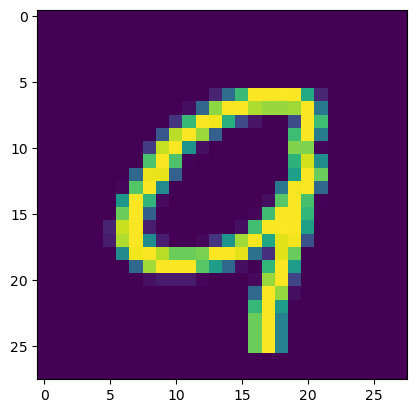

In [3]:
# Use false colors to visualize the array.

plt.imshow(x_train[3000])

In [7]:
x_train[3000][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,  44, 233, 254, 131,  10,   0,   0,   0,   0,   0,   0, 207, 206,   4,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [4]:
 
x_train[3000][10][10]

254

In [5]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized[3000][10][10])

0.996078431372549


In [18]:
def plot_the_curve(epochs, hist, list_of_metrics):
    plt.figure()
    plt.xlabel("epoch")
    plt.ylabel("value")
    
    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)
        
    plt.legend()
    
print("Loaded the plot_curve function.")
        

Loaded the plot_curve function.


In [ ]:
#The create_model function defines the topography of the deep neural net, specifying the following:

#The number of layers in the deep neural net.
#The number of nodes in each layer.
#Any regularization layers.
#The create_model function also defines the activation function of each layer. The activation function of the output layer is softmax, which will yield 10 different outputs for each example. Each of the 10 outputs provides the probability that the input example is a certain digit.

#Note: Unlike several of the recent Colabs, this exercise does not define feature columns or a feature layer. 
#Instead, the model will train on the NumPy array.

In [19]:
def create_model(my_learning_rate):
    model = tf.keras.models.Sequential()
      # The features are stored in a two-dimensional 28X28 array. 
      # Flatten that two-dimensional array into a one-dimensional 
      # 784-element array.
    model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
      # Define the first hidden layer.   
    model.add(tf.keras.layers.Dense(units=32, activation="relu"))
      # Define a dropout regularization layer. 
    model.add(tf.keras.layers.Dropout(rate=0.2))
        # Define the output layer. The units parameter is set to 10 because
      # the model must choose among 10 possible output values (representing
      # the digits from 0 to 9, inclusive).
  
      # Don't change this layer.
    model.add(tf.keras.layers.Dense(units=10, activation="softmax"))
    
     #Construct the layers into a model that TensorFlow can execute.  
      # Notice that the loss function for multi-class classification
      # is different than the loss function for binary classification. 
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate), 
                  loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    return model
    

In [22]:
def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.1):
    
    history = model.fit(x = train_features, y=train_label, batch_size=batch_size, epochs=epochs, 
                        validation_split=validation_split, shuffle=True)
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    return epochs, hist
    
    

Epoch 1/50
12/12 [==============================] - 64s 82ms/step - loss: 1.6619 - accuracy: 0.4789 - val_loss: 0.8849 - val_accuracy: 0.8107
Epoch 2/50
12/12 [==============================] - 0s 40ms/step - loss: 0.8351 - accuracy: 0.7457 - val_loss: 0.5098 - val_accuracy: 0.8662
Epoch 3/50
12/12 [==============================] - 0s 38ms/step - loss: 0.6069 - accuracy: 0.8131 - val_loss: 0.4129 - val_accuracy: 0.8892
Epoch 4/50
12/12 [==============================] - 0s 40ms/step - loss: 0.5087 - accuracy: 0.8482 - val_loss: 0.3607 - val_accuracy: 0.9025
Epoch 5/50
12/12 [==============================] - 0s 37ms/step - loss: 0.4602 - accuracy: 0.8629 - val_loss: 0.3250 - val_accuracy: 0.9103
Epoch 6/50
12/12 [==============================] - 0s 40ms/step - loss: 0.4263 - accuracy: 0.8754 - val_loss: 0.3033 - val_accuracy: 0.9171
Epoch 7/50
12/12 [==============================] - 0s 37ms/step - loss: 0.3987 - accuracy: 0.8846 - val_loss: 0.2846 - val_accuracy: 0.9219
Epoch 8/50
1

[0.14531956613063812, 0.9575999975204468]

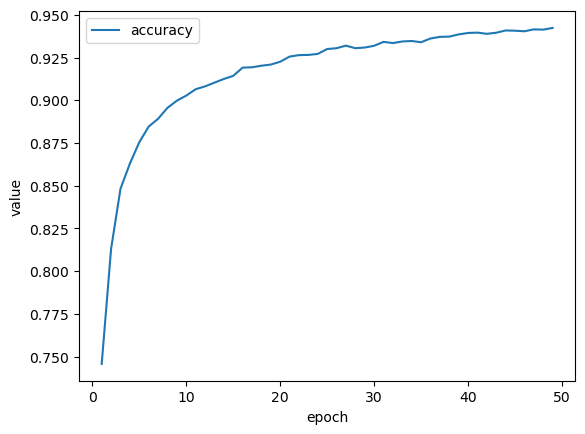

In [24]:
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_the_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)